# 2 - Multiple Linear Regression

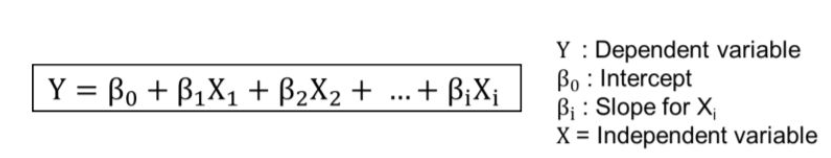

**Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.**

# Import Libraries and Get Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get data
df = pd.read_csv("Advertising.csv")
data = df.copy()
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [2]:
data = data.iloc[:,1:]
data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# Split train and test dataset

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

X = data.drop("sales",axis=1)
y = data["sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [6]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Model with statsmodels

In [7]:
import statsmodels.api as sm

linearModel = sm.OLS(y_train,X_train)
model = linearModel.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              3072.
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                   3.83e-139
Time:                        21:15:46   Log-Likelihood:                         -335.12
No. Observations:                 160   AIC:                                      676.2
Df Residuals:                     157   BIC:                                      685.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0533      0.001     36.962      0.000       0.050       0.056
radio          0.2253      0.010     23.003      0.000       0.206       0.245
newspaper      0.0162      0.007      2.239      0.027       0.002       0.030
==============================================================================
Omnibus:                       10.092   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.145
Skew:                          -0.401   Prob(JB):                      0.00140
Kurtosis:                       4.153   Cond. No.                         12.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared (uncentered):,0.983
Model:,OLS,Adj. R-squared (uncentered):,0.983
Method:,Least Squares,F-statistic:,3072.
Date:,"Sat, 08 Oct 2022",Prob (F-statistic):,3.83e-139
Time:,21:17:22,Log-Likelihood:,-335.12
No. Observations:,160,AIC:,676.2
Df Residuals:,157,BIC:,685.5
Df Model:,3,,
Covariance Type:,nonrobust,,


In [12]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0533,0.001,36.962,0.000,0.050,0.056
radio,0.2253,0.010,23.003,0.000,0.206,0.245
newspaper,0.0162,0.007,2.239,0.027,0.002,0.030


# Sales Formula of the Model

In [23]:
modelFormula = str("(%.2f" % model.params.TV)+ " X "+ "TV) "+"+ " + str("(%.2f" % model.params.radio)+" X "+"radio) " +"+ "+str("(%.2f" % model.params.newspaper)+" X "+"newspaper)"
print(f"Sales = {modelFormula}")

Sales = (0.05 X TV) + (0.23 X radio) + (0.02 X newspaper)


In [25]:
model.fittedvalues[:10]

82      9.113532
101    25.611711
47     22.437369
27     16.932115
44      7.828906
42     21.920634
98     25.801684
76      2.161525
156    15.623137
104    20.510976
dtype: float64

# Model with sklearn

In [29]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
model = linear_model.fit(X_train,y_train)

In [30]:
model.coef_

array([0.04652003, 0.19313293, 0.00175816])

In [35]:
print(f"R2 Score : {model.score(X_train,y_train)}")

R2 Score : 0.8962848476126537


# Prediction with choosed values

In [40]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")

values = [[20,45,66]]

model.predict(values)

array([12.31932734])

# Find RMSE Loss

In [41]:
from sklearn.metrics import mean_squared_error

In [43]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
print(f"RMSE Loss : {rmse}")

RMSE Loss : 1.7098842700636772


# What is Model Tuning ?

**Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.” Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model.**

**Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.**

# What is Cross Validation ?

**Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.**

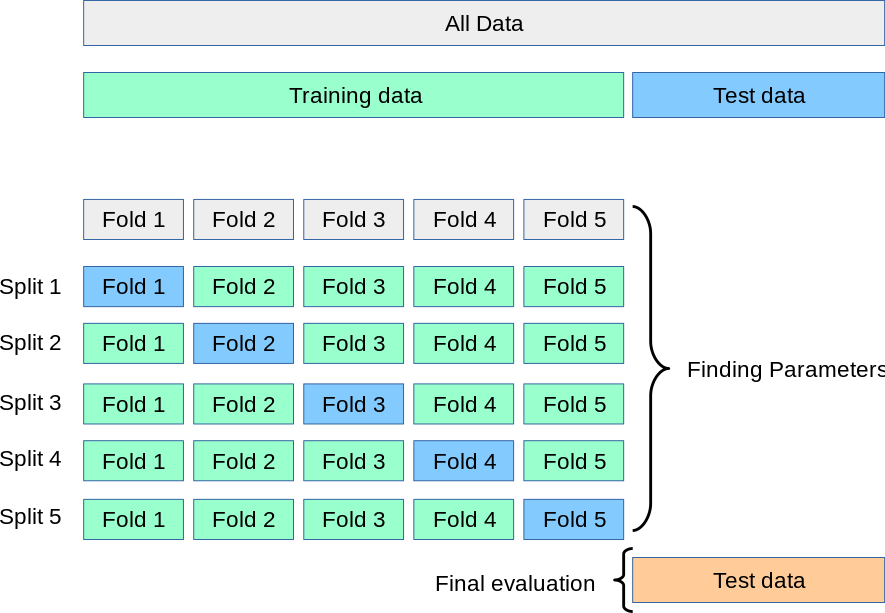

In [70]:
from sklearn.model_selection import cross_val_score

# R2 Scores with Cross-Validated Dataset
# 10 fold cross validation

# Cross-Validated R2 Scores for each fold
cross_val_score(model,X_train,y_train,cv=10,scoring='r2')

array([0.95126609, 0.85217872, 0.73839612, 0.8612479 , 0.81686093,
       0.91774321, 0.93906609, 0.84901819, 0.93556446, 0.81172705])

In [71]:
# Cross-Validated R2 Score Mean
cross_val_score(model,X_train,y_train,cv=10,scoring='r2').mean()

0.8673068771346143

In [72]:
# Cross-Validated RMSE Loss Values for each fold
np.sqrt(-cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))

array([1.41396909, 2.44578406, 1.83589502, 1.76522515, 2.03139702,
       1.37872187, 1.38505863, 2.12314503, 1.18611421, 1.81999939])

In [73]:
# Cross-Validated RMSE Loss Mean Value
np.sqrt(-cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_squared_error')).mean()

1.7385309472194361